# **Swap test**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')
output = QuantumRegister(1, name='output')
output_c = ClassicalRegister(1, name='outputc')
qc = QuantumCircuit(input1, input2, output, output_c)

In [4]:
qc.h(output)
qc.cswap(output, input1, input2)
qc.h(output)
qc.x(output)
qc.measure(output, output_c)

In [5]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

In [6]:
counts = result.get_counts(qc)
print('counts:',counts)

counts: {'1': 1}


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]


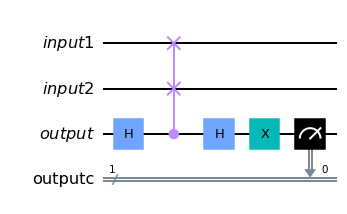

In [7]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit